In [1]:
# standard scaling : subtract the mean and divide by the standard deviation 



In [5]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler, MinMaxScaler



In [7]:
df = {
    "age" : [25,30,40,45],
    "height" : [160,170,180,190],
    "weight" : [50,60,70,80],
}

df = pd.DataFrame(df)

df.head()

,age,height,weight
0,25,160,50
1,30,170,60
2,40,180,70
3,45,190,80


In [12]:
scaler = StandardScaler()

scaled_df = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,age,height,weight
0,-1.264911,-1.341641,-1.341641
1,-0.632456,-0.447214,-0.447214
2,0.632456,0.447214,0.447214
3,1.264911,1.341641,1.341641


# Transformation

Use `scaling` if you primarily want to ensure fair weighting of features in your model and don't necessarily need a normal distribution.<br>

Use a `power transformer` if your data has a non-normal distribution that might affect your model's performance and you want to normalize it (particularly towards a Gaussian distribution).

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [15]:
np.random.seed(0)

df = np.random.exponential(size = 1000, scale=2)

df = pd.DataFrame(df, columns=["value"])

df.head()

,value
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='value', ylabel='Count'>

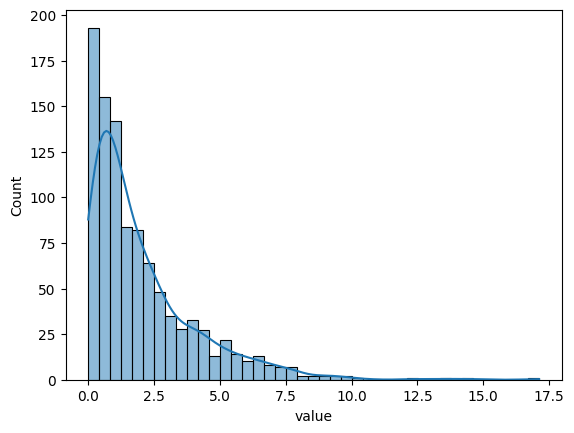

In [17]:
sns.histplot(df["value"], kde=True)

In [20]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [22]:
pt_boxcox = PowerTransformer(method="box-cox",standardize=False)
pt_yeo_johnson = PowerTransformer(method="yeo-johnson",standardize=False)
qt_normal = QuantileTransformer(output_distribution="normal")



In [26]:
df['Box_Cox'] = pt_boxcox.fit_transform(df[['value']] + 1)
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['value']])
df['Quantile'] = qt_normal.fit_transform(df[['value']])

In [27]:
df.head()

,value,Box_Cox,Yeo_Johnson,Quantile
0,1.591749,0.787485,0.787485,0.162552
1,2.511862,0.980233,0.980233,0.587964
2,1.846446,0.849553,0.849553,0.286135
3,1.574402,0.782945,0.782945,0.157469
4,1.102097,0.639848,0.639848,-0.154930


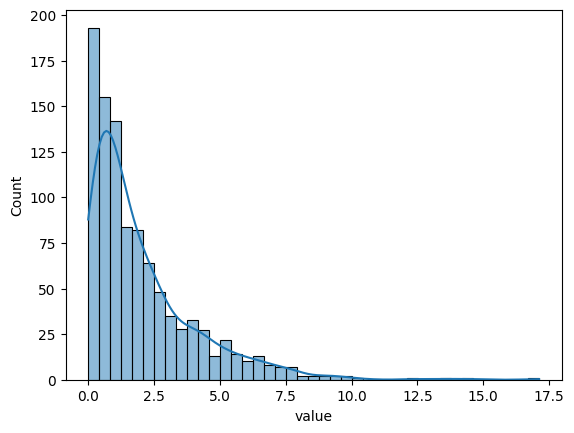

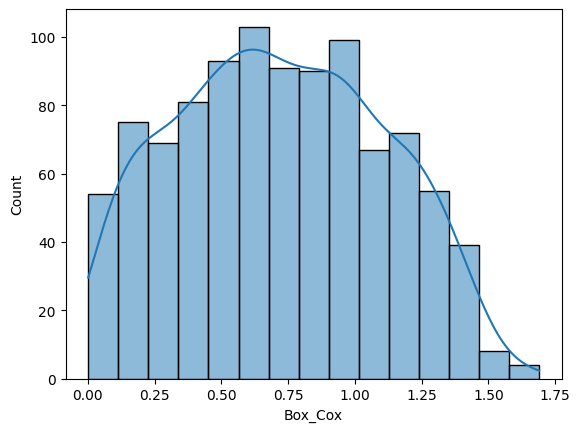

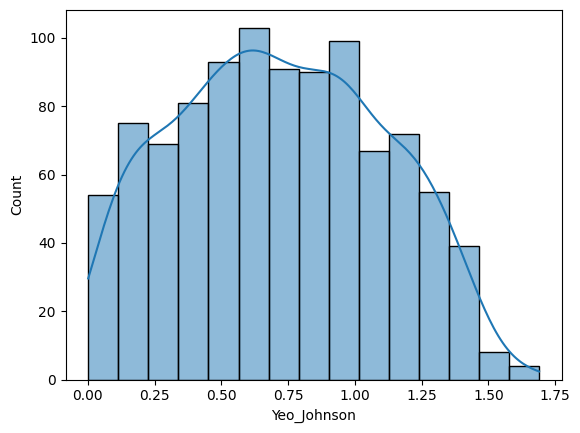

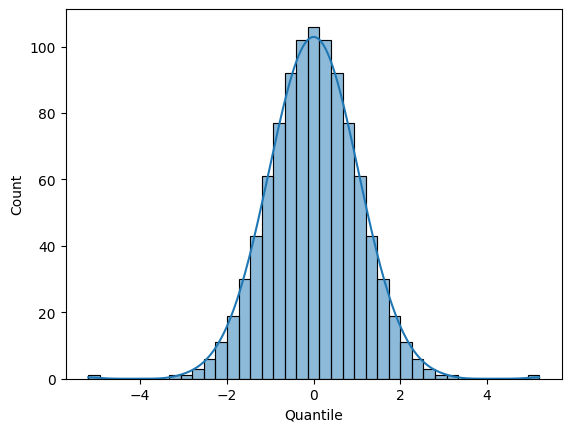

In [28]:
# creata hostograms for all columns using sns.hist and kde=true use a for loop
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

,class_0,class_1
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
